In [2]:
import pandas as pd
import chess
import chess.pgn
import io
import numpy as np



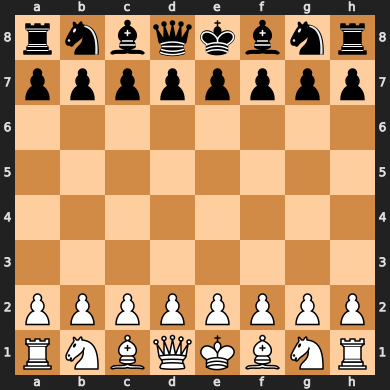

In [3]:
board = chess.Board()
board.legal_moves
board

In [4]:
games = open('lichess_elite_2020-06.pgn')


In [5]:
#games = open('games_short.pgn', encoding='utf-8')
df = pd.DataFrame(columns=['Opening', 'Result', 'WhiteId', 'BlackId', 'WhiteElo', 'BlackElo'])
games = open('lichess_elite_2020-06.pgn')
for k in range(20000) :
   game = chess.pgn.read_game(games)
   df.loc[len(df.index)] = [game.headers['Opening'],  
                            game.headers['Result'], 
                            game.headers['White'], 
                            game.headers['Black'],
                            game.headers['WhiteElo'], 
                            game.headers['BlackElo']]




mapping = {'1-0' : 1, '1/2-1/2' :0, '0-1' : -1}
df.Result = df.Result.map(mapping)

df


,Opening,Result,WhiteId,BlackId,WhiteElo,BlackElo
0,"French Defense: Winawer Variation, Poisoned Pa...",0.0,Cor64,matapalo,2413,2254
1,Sicilian Defense,1.0,Poecraft94,Germanvince,2323,2415
2,Modern Defense: Standard Line,0.0,sandstorm00,yendorzerep,2497,2426
3,Queen's Gambit Declined,-1.0,DanielaAndrade,Dapsay,2387,2416
4,Dutch Defense: Semi-Leningrad Variation,1.0,SuperRuddy,gmbalaargentino,2288,2469
...,...,...,...,...,...,...
19995,Queen's Pawn Game: Krause Variation,-1.0,karpeshovdo,ZeBebelo,2398,2483
19996,Ruy Lopez: Schliemann Defense,-1.0,TimAina1,sstrb,2523,2445
19997,Nimzo-Larsen Attack: Classical Variation,-1.0,ArabianChessKid,swampdragger,2316,2425
19998,Nimzo-Indian Defense: Kmoch Variation,-1.0,zolpi,mshmsh36,2272,2404


# 1. Ouverture

In [6]:
df.loc[(df.Opening == 'Sicilian Defense') & (df.Result == 1) ]

,Opening,Result,WhiteId,BlackId,WhiteElo,BlackElo
1,Sicilian Defense,1.0,Poecraft94,Germanvince,2323,2415
2262,Sicilian Defense,1.0,E-Shaposhnikov,Leon_Livaic,2827,2635
2296,Sicilian Defense,1.0,Mescalero81,HundimBuero,2402,2442
2722,Sicilian Defense,1.0,skorbie,quick_Mate,2624,2605
3262,Sicilian Defense,1.0,Aleksei_Bykov,TheLoneRanger_2019,2459,2441
...,...,...,...,...,...,...
18486,Sicilian Defense,1.0,Jerv7,DuruDido,2425,2505
18570,Sicilian Defense,1.0,PinePiper,FlinkerFreddy,2674,2463
19597,Sicilian Defense,1.0,jj-chessgod,PIRATE1399,2537,2337
19829,Sicilian Defense,1.0,SharkOxon,AlexMitAlex,2445,2295


In [46]:

openings = df.Opening.unique()
openings
liste = []
for opening in openings :
    liste.append([opening,len(df.loc[(df.Opening == opening) & (df.Result == 1)]), len(df.loc[(df.Opening == opening) & (df.Result == 0)]), len(df.loc[(df.Opening == opening) & (df.Result == -1)])])

liste
#df.value_counts('Opening')


[['French Defense: Winawer Variation, Poisoned Pawn Variation', 12, 3, 5],
 ['Sicilian Defense', 73, 14, 53],
 ['Modern Defense: Standard Line', 22, 11, 28],
 ["Queen's Gambit Declined", 33, 4, 24],
 ['Dutch Defense: Semi-Leningrad Variation', 1, 1, 2],
 ['Caro-Kann Defense: Two Knights Attack', 41, 15, 24],
 ['Sicilian Defense: French Variation, Westerinen Attack', 14, 2, 8],
 ['Nimzowitsch Defense: Williams Variation', 12, 3, 6],
 ['French Defense: Advance Variation', 11, 4, 10],
 ["King's Indian Defense: Orthodox Variation, Glek Defense", 12, 1, 12],
 ["Queen's Pawn Game: Krause Variation", 5, 1, 8],
 ["King's Indian Defense: Normal Variation", 20, 3, 14],
 ['French Defense: Classical Variation, Steinitz Variation', 11, 4, 11],
 ['Scotch Game: Classical Variation, Intermezzo Variation', 3, 1, 2],
 ["Queen's Pawn Game: London System", 50, 16, 57],
 ['Scandinavian Defense: Mieses-Kotroc Variation', 44, 8, 53],
 ['Trompowsky Attack', 97, 19, 83],
 ['Italian Game: Scotch Gambit, Nakhman

Ici, on ne retient que l'ouverture générale

In [45]:
df2 = df.copy()
df2.Opening = df2.Opening.apply(lambda x : x[0:1+x.find(":")])
openings = df2.Opening.unique()

liste = []
for opening in openings :
    if opening != '' :
       n = len(df2.loc[df2.Opening == opening])
       liste.append([opening,len(df2.loc[df2.Opening == opening]),len(df2.loc[(df2.Opening == opening) & (df2.Result == 1)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == 0)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == -1)])/n])

Results_df = pd.DataFrame(columns = ['Opening', 'Number of games', 'White wins', 'Draw', 'Black wins'])

for opening in liste :
    Results_df.loc[len(Results_df.index)] = [opening[0], opening[1], str(100*round(opening[2],4)) + '%', str(100*round(opening[3],4)) + '%', str(100*round(opening[4],4)) + '%']

Results_df
    



,Opening,Number of games,White wins,Draw,Black wins
0,French Defense:,1122,46.08%,10.34%,43.580000000000005%
1,Modern Defense:,333,44.440000000000005%,8.41%,47.15%
2,Dutch Defense:,143,47.55%,11.89%,40.56%
3,Caro-Kann Defense:,857,47.49%,10.85%,41.660000000000004%
4,Sicilian Defense:,3514,47.27%,9.22%,43.480000000000004%
...,...,...,...,...,...
71,Petrov:,1,100.0%,0.0%,0.0%
72,Owen Defense:,1,100.0%,0.0%,0.0%
73,London System:,1,100.0%,0.0%,0.0%
74,Rubinstein Opening:,1,100.0%,0.0%,0.0%


# 2. IDs et Elos

In [23]:
df

,Opening,Result,WhiteId,BlackId,WhiteElo,BlackElo
0,"French Defense: Winawer Variation, Poisoned Pa...",0.0,Cor64,matapalo,2413,2254
1,Sicilian Defense,1.0,Poecraft94,Germanvince,2323,2415
2,Modern Defense: Standard Line,0.0,sandstorm00,yendorzerep,2497,2426
3,Queen's Gambit Declined,-1.0,DanielaAndrade,Dapsay,2387,2416
4,Dutch Defense: Semi-Leningrad Variation,1.0,SuperRuddy,gmbalaargentino,2288,2469
...,...,...,...,...,...,...
19995,Queen's Pawn Game: Krause Variation,-1.0,karpeshovdo,ZeBebelo,2398,2483
19996,Ruy Lopez: Schliemann Defense,-1.0,TimAina1,sstrb,2523,2445
19997,Nimzo-Larsen Attack: Classical Variation,-1.0,ArabianChessKid,swampdragger,2316,2425
19998,Nimzo-Indian Defense: Kmoch Variation,-1.0,zolpi,mshmsh36,2272,2404


Objectif : avoir un dataset avec nom de joueur, Elo max, nombre de parties, ouverture principale, parties gagnées, parties perdues

In [24]:
# Liste de tous les joueurs : 

players = pd.Series(pd.Series(np.concatenate((df.WhiteId.unique(),df.BlackId.unique()))).unique())


In [25]:
df_players = pd.DataFrame(columns = ['Elo max', 'Nb_parties'])

In [26]:
df_players

,Elo max,Nb_parties


In [27]:
#df.WhiteId.value_counts()['Poecraft94']
(df.BlackId.value_counts()['Poecraft94'] if 'Poecraft94' in df.BlackId.value_counts() else 0) + (df.WhiteId.value_counts()['Poecraft94'] if 'Poecraft94' in df.WhiteId.value_counts() else 0)

2

In [28]:
df_players = pd.DataFrame(columns = ['Elo_max', 'Nb_parties', 'Ouverture_Favorite', 'Ouverture_wins', 'Ouverture_lose'])

df_players['Elo_max'] = players.apply(lambda x : max(int(df[(df.WhiteId == x) | (df.BlackId == x)].WhiteElo.max()),int(df[(df.WhiteId == x) | (df.BlackId == x)].BlackElo.max())))

df_players['Nb_parties'] = players.apply(lambda x : (df.BlackId.value_counts()[x] if x in df.BlackId.value_counts() else 0) + (df.WhiteId.value_counts()[x] if x in df.WhiteId.value_counts() else 0))

df_players['Ouverture_Favorite'] = players.apply(lambda x :pd.concat((df[df.WhiteId == x].Opening, df[df.BlackId == x].Opening)).value_counts().index[0])





In [30]:
df_players['Player'] = players


In [31]:


df_players.sort_values(by = 'Elo_max', ascending= False)

,Elo_max,Nb_parties,Ouverture_Favorite,Ouverture_wins,Ouverture_lose,Player
3296,2898,10,"Italian Game: Classical Variation, Greco Gambi...",NaN,NaN,Last7Samurai
2741,2898,36,"Sicilian Defense: Paulsen Variation, Bastrikov...",NaN,NaN,Liem_Chess
2130,2895,111,"Sicilian Defense: Paulsen Variation, Bastrikov...",NaN,NaN,LittlePeasant
475,2890,94,Sicilian Defense: Najdorf Variation,NaN,NaN,avchess1
71,2889,48,Queen's Gambit Declined,NaN,NaN,Lazarskyj
...,...,...,...,...,...,...
1815,2400,1,"Old Indian Defense: Janowski Variation, Fianch...",NaN,NaN,AlphaWolf007
4863,2400,1,Hungarian Opening,NaN,NaN,Medalhista
4528,2400,1,Sicilian Defense: Modern Variations,NaN,NaN,bang_Didi
4130,2400,1,"Sicilian Defense: Najdorf Variation, Poisoned ...",NaN,NaN,Chessil


In [32]:
df_players.loc[df_players['Elo_max'].argmax()]

Elo_max                                                            2898
Nb_parties                                                           36
Ouverture_Favorite    Sicilian Defense: Paulsen Variation, Bastrikov...
Ouverture_wins                                                      NaN
Ouverture_lose                                                      NaN
Player                                                       Liem_Chess
Name: 2741, dtype: object

In [33]:
pd.concat((df[(df.WhiteId == 'Mazacrola') & (df.Result == 1)].Opening, df[(df.BlackId == 'Mazacrola') & (df.Result == -1)].Opening)).value_counts().index[0]

'Sicilian Defense: Najdorf Variation'

In [34]:
df[df.BlackId == 'Mazacrola'].Opening

736                               Blumenfeld Countergambit
771      English Opening: Symmetrical Variation, Anti-B...
829      English Opening: Symmetrical Variation, Anti-B...
873      Benoni Defense: Classical Variation, New York ...
914                               Blumenfeld Countergambit
                               ...                        
15377                          French Defense: Wing Gambit
15425                          French Defense: Wing Gambit
15455                             Blumenfeld Countergambit
15584                   Sicilian Defense: French Variation
15612    Sicilian Defense: Four Knights Variation, Exch...
Name: Opening, Length: 99, dtype: object

In [35]:
df_players.loc[5134]

Elo_max                                                            2446
Nb_parties                                                            1
Ouverture_Favorite    Neo-Grünfeld Defense: Classical Variation, Ori...
Ouverture_wins                                                      NaN
Ouverture_lose                                                      NaN
Player                                                      SamanArmand
Name: 5134, dtype: object

In [36]:
def find_wins(x):
    if len(pd.concat((df[(df.WhiteId == x) & (df.Result == 1)].Opening, df[(df.BlackId == x) & (df.Result == -1)].Opening)).value_counts().index) != 0:
        return pd.concat((df[(df.WhiteId == x) & (df.Result == 1)].Opening, df[(df.BlackId == x) & (df.Result == -1)].Opening)).value_counts().index[0]
    else:
        return None
    
def find_defeats(x):
    if len(pd.concat((df[(df.WhiteId == x) & (df.Result == -1)].Opening, df[(df.BlackId == x) & (df.Result == 1)].Opening)).value_counts().index) != 0:
        return pd.concat((df[(df.WhiteId == x) & (df.Result == -1)].Opening, df[(df.BlackId == x) & (df.Result == 1)].Opening)).value_counts().index[0]
    else:
        return None

df_players['Ouverture_wins'] = players.apply(find_wins)
df_players['Ouverture_loses'] = players.apply(find_defeats)

In [157]:
pd.concat((df[(df.WhiteId == 'Poecraft94') & (df.Result == 1)].Opening, df[(df.BlackId == 'Poecraft94') & (df.Result == -1)].Opening)).value_counts().index[0]

'Sicilian Defense'

In [41]:
df_players = df_players.drop(['Ouverture_lose'], axis = 1)

In [42]:
df_players

,Elo_max,Nb_parties,Ouverture_Favorite,Ouverture_wins,Player,Ouverture_loses
0,2578,154,Sicilian Defense: Najdorf Variation,Sicilian Defense: Najdorf Variation,Cor64,Sicilian Defense: Najdorf Variation
1,2415,2,Sicilian Defense,Sicilian Defense,Poecraft94,"Sicilian Defense: Closed Variation, Traditional"
2,2599,13,Modern Defense: Standard Line,Sicilian Defense: Closed Variation,sandstorm00,Nimzo-Indian Defense: Kmoch Variation
3,2456,13,"Nimzo-Indian Defense: Classical Variation, Ber...","Nimzo-Indian Defense: Classical Variation, Ber...",DanielaAndrade,Queen's Gambit Declined
4,2585,9,Dutch Defense: Semi-Leningrad Variation,Dutch Defense: Semi-Leningrad Variation,SuperRuddy,Indian Game: Tartakower Attack
...,...,...,...,...,...,...
5134,2446,1,"Neo-Grünfeld Defense: Classical Variation, Ori...",None,SamanArmand,"Neo-Grünfeld Defense: Classical Variation, Ori..."
5135,2548,1,Modern Defense,Modern Defense,HelgiGretarsson,None
5136,2429,1,"Italian Game: Giuoco Pianissimo, Normal",None,ehlabas,"Italian Game: Giuoco Pianissimo, Normal"
5137,2415,1,Sicilian Defense: Delayed Alapin,None,Bibekthing,Sicilian Defense: Delayed Alapin


# 3. Relations entre les joueurs

In [50]:
del list

(-0.5191978761243259,
 5.49374982244693,
 -0.47798247366171104,
 5.492208847279803)

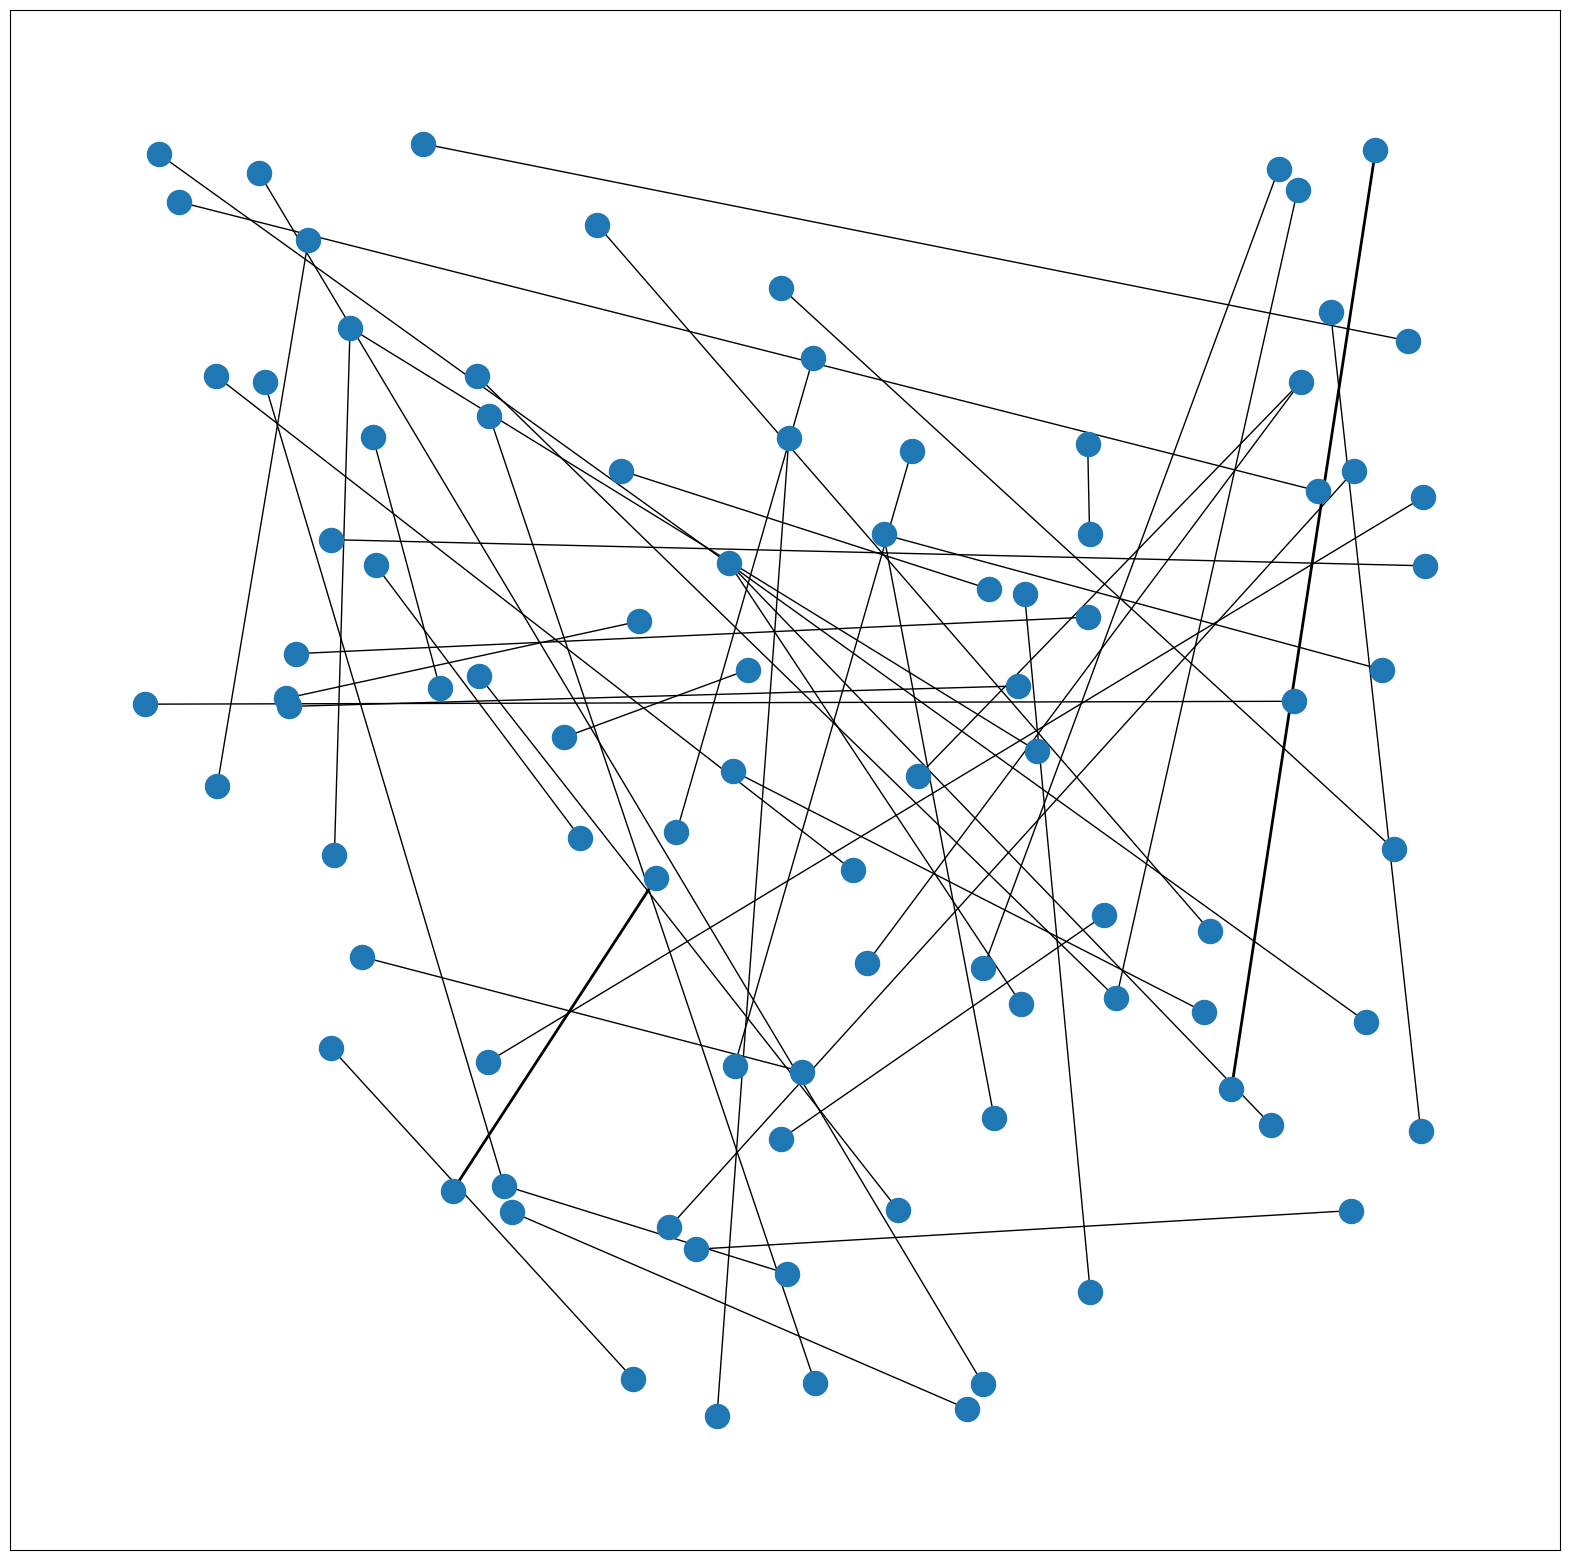

In [60]:
df_players_rel = pd.DataFrame(columns=['Opening', 'Result'])
games = open('lichess_elite_2020-06.pgn')
dico_vs = {}
for k in range(50) :
   game = chess.pgn.read_game(games)
   black = game.headers['Black']
   white = game.headers['White']
   # création d'un dico des adversaires + nbr de parties jouées en parcourant les joueurs noirs
   if black not in dico_vs :
      dico_vs[black] = {white : 1}
   elif white not in dico_vs[black] :
      dico_vs[black][white] = 1
   elif white in dico_vs[black]:
      dico_vs[black][white] += 1
   # idem en parcourant les joueurs blancs (on aura les infos en double et une matrice d'adjacence symétrique mais on en a besoin pour tracer le graphe)
   if white not in dico_vs :
      dico_vs[white] = {black : 1}
   elif black not in dico_vs[white] :
      dico_vs[white][black] = 1
   elif black in dico_vs[white]:
      dico_vs[white][black] += 1

# création d'une matrice d'adjacence des joueurs : le coef (i,j) représente le nombre de parties entre i et j
def dict_to_adj(dico) :
    list_vs = list(dico)
    n = len(list_vs)
    adj = np.zeros([n,n])
    for player in dico.keys():
        for opponent in (dico[player]).keys() :
            adj[list_vs.index(player)][list_vs.index(opponent)] = dico_vs[player][opponent]
    return adj
adj = dict_to_adj(dico_vs)

import matplotlib.pyplot as plt
import networkx as nx
import random as rd
G = nx.from_numpy_array(adj)
weights = []
edges = G.edges(data=True)
edges
for edge in edges :
     
     weights.append(edge[2]['weight'])
plt.figure(figsize=(20,20))
#nx.draw_random(G)
pos = {node : [rd.random()*5, rd.random()*5] for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, label = dico_vs.keys())
nx.draw_networkx_edges(G, pos, width = weights)
plt.axis('equal')

In [53]:
adj.max()

11.0